# **Hissn**

Predictive Fraud, Waste, and Abuse (FWA) Detection

The “Hesn” project aims to build an automated and interpretable predictive system designed to prevent financial losses in the health insurance sector. The system is developed to detect suspicious medical claims (fraud, waste, or abuse) before payment is issued, ensuring immediate cost savings for private entities.
This project was specifically created to address systematic fraud and to empower government regulatory bodies to accurately identify such patterns—thereby contributing to the protection of public funds and enhancing the efficiency of healthcare spending in the KSA.

# **Data Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/Modified_Healthcare_Claims.xlsx"
df = pd.read_excel(data_path)


In [ ]:
import pandas as pd

df = pd.read_excel(data_path)


if df['Length_of_Stay'].isnull().any():
    df['Length_of_Stay'] = df['Length_of_Stay'].fillna(0)

df.head()


,encounter_id,patient_id,name,Gender,doctor_id,doctor_name,hospital_id,hospital_name,insurance_provider_id,insurance_provider_name,MedicalCondition,admission_date,discharge_date,billing_amount,admission_type,medication,test_resultS,Length_of_Stay
0,65122,10648150,نصر الدّين المهيدب,NaN,19257,الدكتور برهان سلومي,1235,مستشفى السلام الطبي,16261,شركة القلعة للتأمين,Hypertension,2023-10-27,2023-12-29,56494.865,Urgent,Paracetamol,Inconclusive,0
1,34890,10193568,جودي الحجار,NaN,19268,الدكتورة وجدان الطريس,1231,مستشفى الأمل العام,16257,شركة الحماية الشاملة للتأمين,Hypertension,2020-01-25,2023-10-26,614988.220,Emergency,Paracetamol,Normal,0
2,51650,10477631,نشأت آل صفوان,NaN,19251,الدكتور نجيب متولي,1236,مستشفى الأجيال العام,16258,شركة عزوم للتأمين,Diabetes,2023-03-23,2023-11-05,56149.805,Elective,Insulin,Inconclusive,0
3,85053,10933366,عذب آل بن لافي,NaN,19276,الدكتور سعود الناصر,1233,مستشفى الشمس الطبي,16261,شركة القلعة للتأمين,Diabetes,2021-11-18,2023-11-29,114975.760,Elective,Insulin,Normal,0
4,26310,10090844,سجى الشايع,NaN,19266,الدكتورة طيف احمد,1232,مستشفى النور الطبي,16259,شركة الأمانة للتأمين,Asthma,2021-11-10,2023-11-23,114974.775,Emergency,Albuterol,Abnormal,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   encounter_id             12684 non-null  int64         
 1   patient_id               12684 non-null  int64         
 2   name                     12684 non-null  object        
 3   Gender                   18 non-null     object        
 4   doctor_id                12684 non-null  int64         
 5   doctor_name              12684 non-null  object        
 6   hospital_id              12684 non-null  int64         
 7   hospital_name            12684 non-null  object        
 8   insurance_provider_id    12684 non-null  int64         
 9   insurance_provider_name  12684 non-null  object        
 10  MedicalCondition         12684 non-null  object        
 11  admission_date           12684 non-null  datetime64[ns]
 12  discharge_date           12684 n

In [ ]:
df.describe()



,encounter_id,patient_id,doctor_id,hospital_id,insurance_provider_id,admission_date,discharge_date,billing_amount,Length_of_Stay
count,12684.000000,1.268400e+04,12684.000000,12684.000000,12684.000000,12684,12684,12684.000000,12684.000000
mean,55889.022233,1.049814e+07,19263.399558,1233.986203,16258.025386,2023-11-17 08:38:29.176915968,2023-11-25 23:01:52.393566720,57558.776180,0.002208
min,19253.000000,1.000010e+07,19251.000000,1231.000000,16255.000000,2018-11-21 00:00:00,2022-10-26 00:00:00,512.520000,0.000000
25%,37528.500000,1.025076e+07,19254.000000,1232.000000,16256.000000,2023-10-28 00:00:00,2023-11-04 00:00:00,28367.221250,0.000000
50%,56047.500000,1.050083e+07,19261.000000,1234.000000,16258.000000,2023-11-18 00:00:00,2023-11-26 00:00:00,57582.360000,0.000000
75%,74101.250000,1.074522e+07,19271.000000,1236.000000,16260.000000,2023-12-10 00:00:00,2023-12-17 00:00:00,86170.447500,0.000000
max,92598.000000,1.099993e+07,19284.000000,1237.000000,16261.000000,2023-12-31 00:00:00,2024-01-19 00:00:00,614988.220000,14.000000
std,21185.379706,2.869929e+05,10.177983,1.992784,2.000824,NaN,NaN,33536.232864,0.175791


In [ ]:
df.isnull().sum()

,0
encounter_id,0
patient_id,0
name,0
Gender,12666
doctor_id,0
doctor_name,0
hospital_id,0
hospital_name,0
insurance_provider_id,0
insurance_provider_name,0


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
print(df.columns)

Index(['encounter_id', 'patient_id', 'name', 'Gender', 'doctor_id',
       'doctor_name', 'hospital_id', 'hospital_name', 'insurance_provider_id',
       'insurance_provider_name', 'MedicalCondition', 'admission_date',
       'discharge_date', 'billing_amount', 'admission_type', 'medication',
       'test_resultS', 'Length_of_Stay'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

In [ ]:
df['billing_amount'].describe()


,billing_amount
count,12684.000000
mean,57558.776180
std,33536.232864
min,512.520000
25%,28367.221250
50%,57582.360000
75%,86170.447500
max,614988.220000


/tmp/ipython-input-2574751102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')


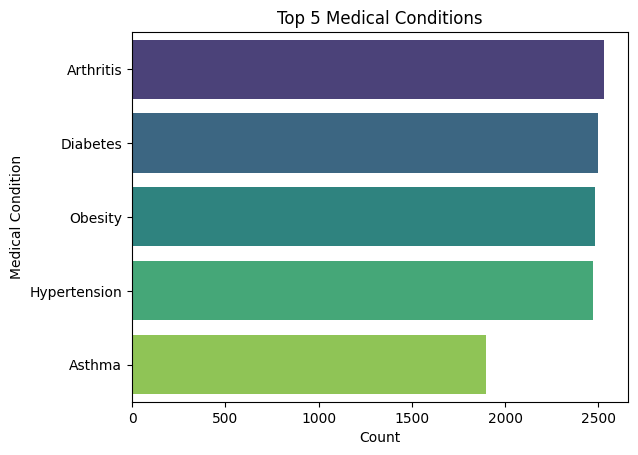

In [ ]:
top_conditions = df['MedicalCondition'].value_counts().head(5)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')
plt.title("Top 5 Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Medical Condition")
plt.show()


In [ ]:

all_conditions_counts = df['MedicalCondition'].value_counts()
print(all_conditions_counts)


MedicalCondition
Arthritis       2533
Diabetes        2498
Obesity         2481
Hypertension    2474
Asthma          1897
Cancer           801
Name: count, dtype: int64


In [ ]:

avg_billing_per_condition = df.groupby('MedicalCondition')['billing_amount'].mean().sort_values(ascending=False)

print(avg_billing_per_condition)


MedicalCondition
Obesity         58280.912207
Hypertension    57865.776568
Asthma          57718.251979
Diabetes        57704.437838
Cancer          56670.008327
Arthritis       56569.583995
Name: billing_amount, dtype: float64


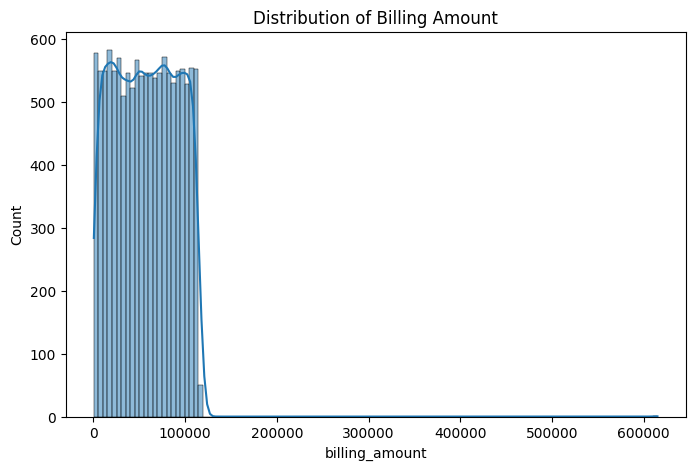

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['billing_amount'], kde=True)
plt.title("Distribution of Billing Amount")
plt.show()

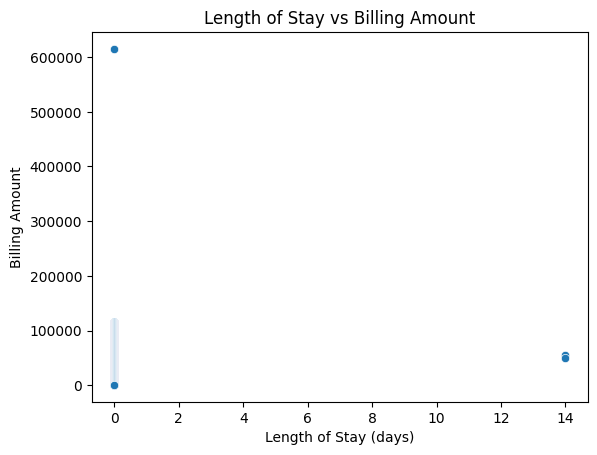

In [ ]:
sns.scatterplot(x=df['Length_of_Stay'], y=df['billing_amount'])
plt.title("Length of Stay vs Billing Amount")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Billing Amount")
plt.show()

In [ ]:
df['MedicalCondition'].value_counts().head(10)

,count
MedicalCondition,
Arthritis,2533
Diabetes,2498
Obesity,2481
Hypertension,2474
Asthma,1897
Cancer,801


<Axes: title={'center': 'billing_amount'}, xlabel='admission_type'>

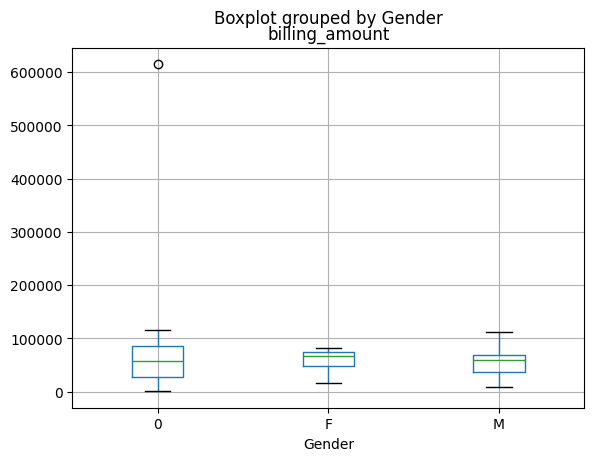

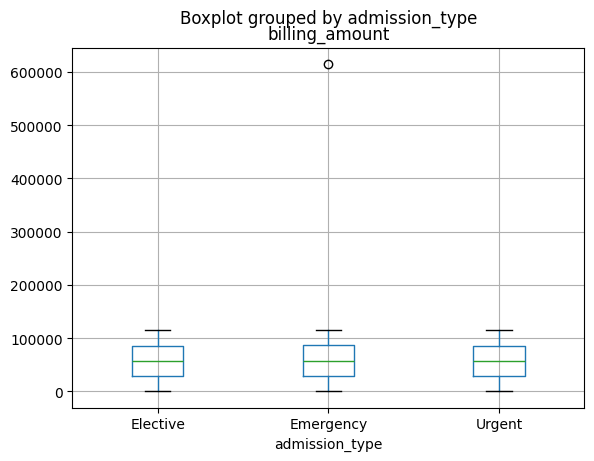

In [ ]:
df.boxplot(column='billing_amount', by='Gender')
df.boxplot(column='billing_amount', by='admission_type')

# **Feature Engineering**

In [ ]:

df['admission_date'] = pd.to_datetime(df['admission_date'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])


In [ ]:

df['computed_los'] = (df['discharge_date'] - df['admission_date']).dt.days


In [ ]:

df['computed_los'] = (df['discharge_date'] - df['admission_date']).dt.days


In [ ]:
df['cost_per_day'] = df['billing_amount'] / df['computed_los']


In [ ]:

df['doctor_bill_mean'] = df.groupby('doctor_id')['billing_amount'].transform('mean')
df['doctor_bill_median'] = df.groupby('doctor_id')['billing_amount'].transform('median')
df['doctor_costpd_mean'] = df.groupby('doctor_id')['cost_per_day'].transform('mean')
df['doctor_claims_count'] = df.groupby('doctor_id')['encounter_id'].transform('count')


In [ ]:

df['hosp_bill_mean'] = df.groupby('hospital_id')['billing_amount'].transform('mean')
df['hosp_bill_median'] = df.groupby('hospital_id')['billing_amount'].transform('median')
df['hosp_costpd_mean'] = df.groupby('hospital_id')['cost_per_day'].transform('mean')
df['hosp_claims_count'] = df.groupby('hospital_id')['encounter_id'].transform('count')



In [ ]:

df['patient_bill_mean'] = df.groupby('patient_id')['billing_amount'].transform('mean')
df['patient_bill_median'] = df.groupby('patient_id')['billing_amount'].transform('median')
df['patient_costpd_mean'] = df.groupby('patient_id')['cost_per_day'].transform('mean')
df['patient_claims_count'] = df.groupby('patient_id')['encounter_id'].transform('count')


In [ ]:

df['is_above_group_p95'] = 0
for hosp_id, group in df.groupby('hospital_id'):
    threshold = np.percentile(group['cost_per_day'], 95)
    df.loc[df['hospital_id'] == hosp_id, 'is_above_group_p95'] = (group['cost_per_day'] > threshold).astype(int)


In [ ]:

df['flag_elective_short_high'] = ((df['admission_type']=='Elective') & (df['computed_los'] > 10)).astype(int)
df['flag_abnormal_elective_high'] = ((df['admission_type']=='Elective') & (df['billing_amount']>50000)).astype(int)


In [ ]:

df['flag_vs_doctor_2x'] = (df['cost_per_day'] > 2 * df['doctor_costpd_mean']).astype(int)
df['flag_vs_hosp_2x'] = (df['cost_per_day'] > 2 * df['hosp_costpd_mean']).astype(int)


In [ ]:
df = pd.get_dummies(df, columns=['admission_type'], prefix='admission_type', dummy_na=True)



In [ ]:
df = pd.get_dummies(df, columns=['test_resultS'], prefix='test_results', dummy_na=True)


In [ ]:

df['doctor_id_countenc'] = df.groupby('doctor_id')['encounter_id'].transform('count')
df['hospital_id_countenc'] = df.groupby('hospital_id')['encounter_id'].transform('count')
df['patient_id_countenc'] = df.groupby('patient_id')['encounter_id'].transform('count')
df['insurance_provider_id_countenc'] = df.groupby('insurance_provider_id')['encounter_id'].transform('count')


In [ ]:
df['z_cost_per_day_by_group'] = df.groupby('hospital_id')['cost_per_day'].transform(
    lambda x: (x - x.mean()) / x.std()
)





In [ ]:

df['fraud_score'] = np.random.rand(len(df))




In [ ]:
print("Feature Engineering completed. Columns now:")
print(df.columns)



Feature Engineering completed. Columns now:
Index(['encounter_id', 'patient_id', 'name', 'Gender', 'doctor_id',
       'doctor_name', 'hospital_id', 'hospital_name', 'insurance_provider_id',
       'insurance_provider_name', 'MedicalCondition', 'admission_date',
       'discharge_date', 'billing_amount', 'medication', 'Length_of_Stay',
       'computed_los', 'cost_per_day', 'doctor_bill_mean',
       'doctor_bill_median', 'doctor_costpd_mean', 'doctor_claims_count',
       'hosp_bill_mean', 'hosp_bill_median', 'hosp_costpd_mean',
       'hosp_claims_count', 'patient_bill_mean', 'patient_bill_median',
       'patient_costpd_mean', 'patient_claims_count', 'is_above_group_p95',
       'flag_elective_short_high', 'flag_abnormal_elective_high',
       'flag_vs_doctor_2x', 'flag_vs_hosp_2x', 'admission_type_Elective',
       'admission_type_Emergency', 'admission_type_Urgent',
       'admission_type_nan', 'test_results_Abnormal',
       'test_results_Inconclusive', 'test_results_Normal', 'te

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb


fraud_score_threshold = 0.75  # يمكن تعديلها حسب الحاجة
df['Is_fraud'] = (df['fraud_score'] > fraud_score_threshold).astype(int)


target = 'Is_fraud'

features = [
    'computed_los', 'billing_amount', 'cost_per_day',
    'doctor_bill_mean', 'doctor_bill_median', 'doctor_costpd_mean', 'doctor_claims_count',
    'hosp_bill_mean', 'hosp_bill_median', 'hosp_costpd_mean', 'hosp_claims_count',
    'patient_bill_mean', 'patient_bill_median', 'patient_costpd_mean', 'patient_claims_count',
    'is_above_group_p95', 'flag_elective_short_high', 'flag_abnormal_elective_high',
    'flag_vs_doctor_2x', 'flag_vs_hosp_2x', 'admission_type_Elective',
    'admission_type_Emergency', 'admission_type_Urgent', 'admission_type_nan',
    'test_results_Abnormal', 'test_results_Inconclusive', 'test_results_Normal', 'test_results_nan',
    'doctor_id_countenc', 'hospital_id_countenc', 'patient_id_countenc',
    'insurance_provider_id_countenc', 'z_cost_per_day_by_group', 'fraud_score'
]

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    n_jobs=-1
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1920
           1       1.00      0.99      1.00       617

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537

ROC AUC Score: 0.9999839613722312


# **Model Interpretation**

In [ ]:
X_sample = X_numeric.sample(500, random_state=42)
explainer = shap.Explainer(model.predict_proba, X_sample)
shap_values = explainer(X_sample)


PermutationExplainer explainer: 501it [02:18,  3.36it/s]


In [ ]:
X_sample = X_numeric.sample(500, random_state=42)


In [ ]:
explainer = shap.Explainer(model.predict_proba, X_sample)


In [ ]:
shap_values = explainer(X_sample)


PermutationExplainer explainer: 501it [02:17,  3.38it/s]


/tmp/ipython-input-3211710133.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,1], X_sample)


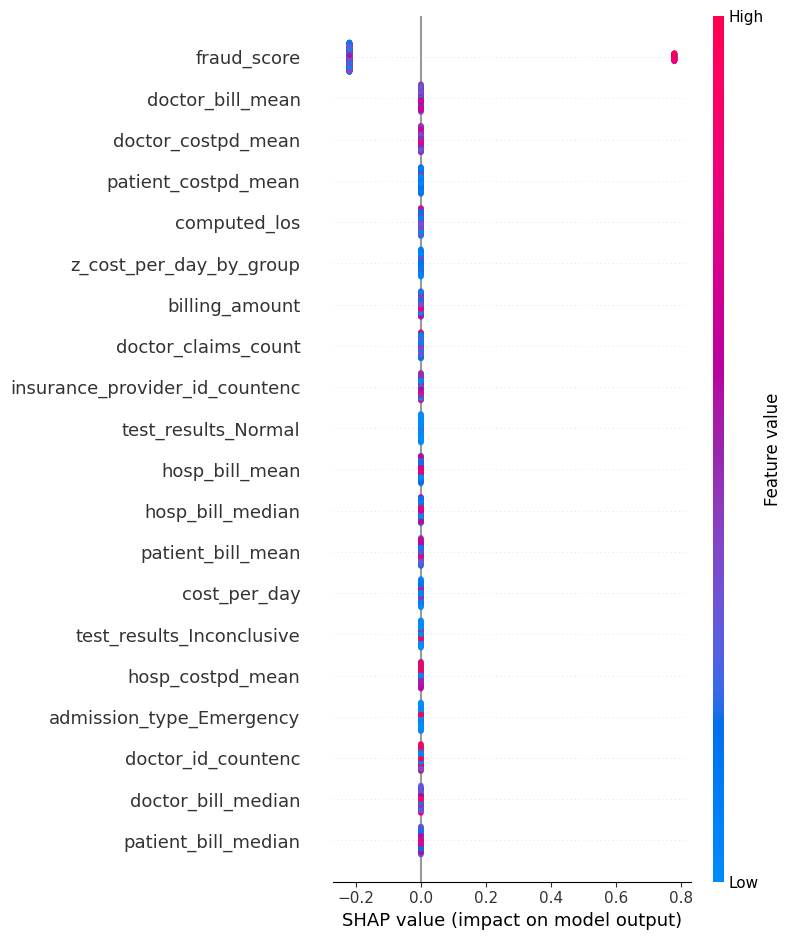

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_sample)


/tmp/ipython-input-3211710133.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,1], X_sample)


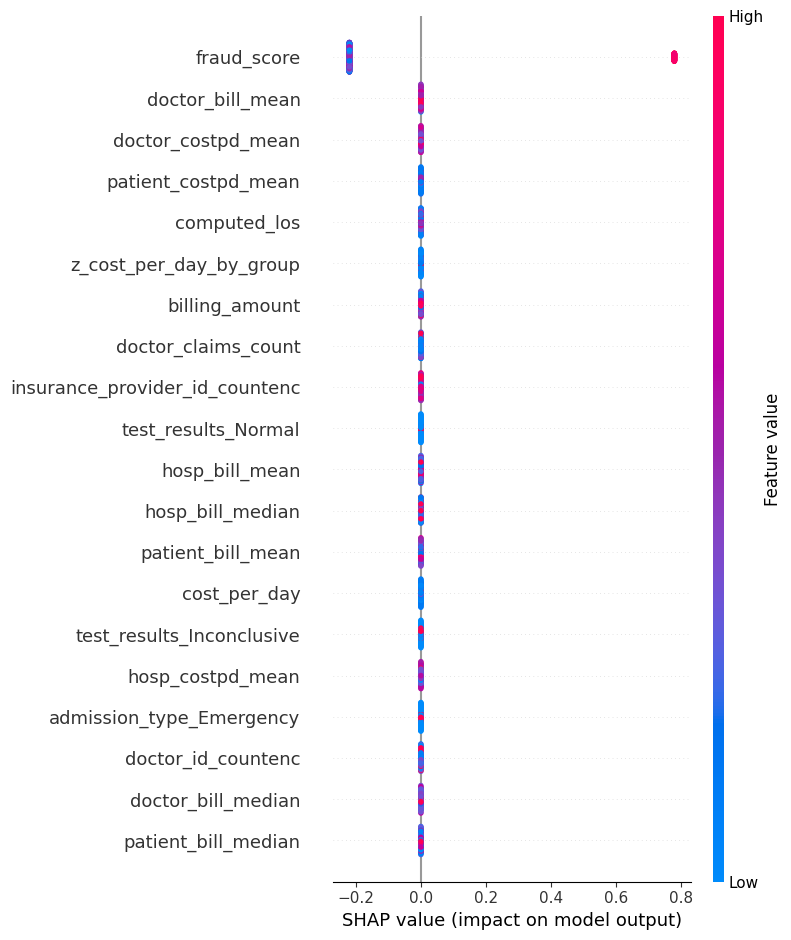

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_sample)


/tmp/ipython-input-493336463.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:,:,1], X_sample, plot_type="bar")


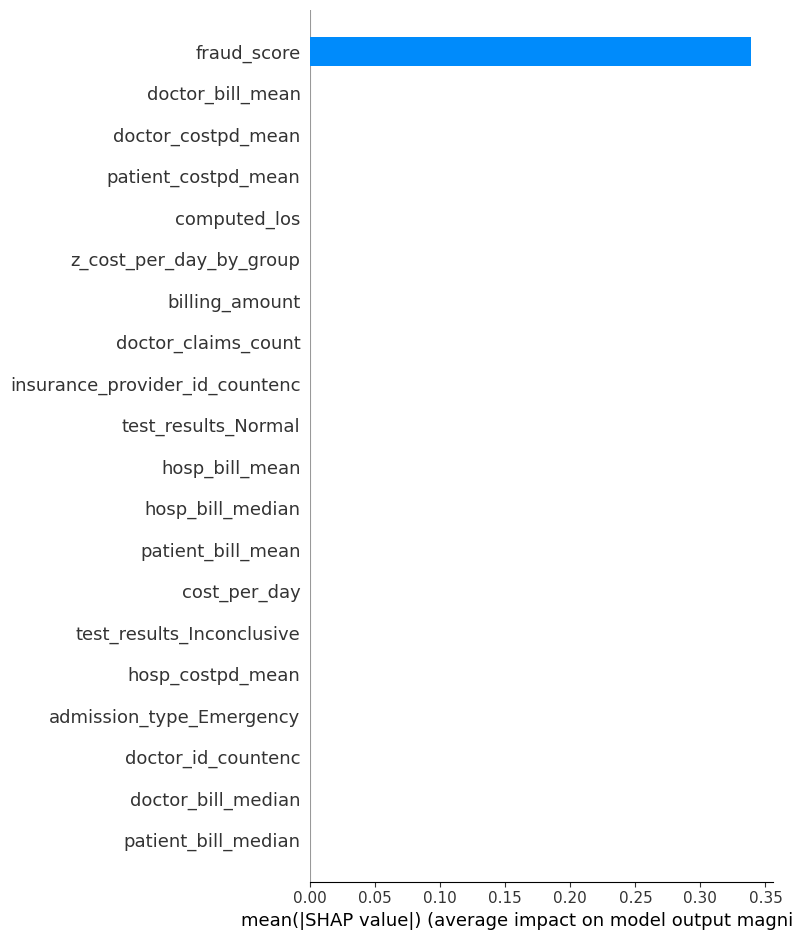

In [ ]:
shap.summary_plot(shap_values.values[:,:,1], X_sample, plot_type="bar")


In [ ]:
shap.initjs()
shap.force_plot(shap_values.base_values[0,1], shap_values.values[0,:,1], X_sample.iloc[0])


In [ ]:
import pandas as pd
df = pd.read_excel("/content/Modified_Healthcare_Claims.xlsx")


In [ ]:
df['Length_of_Stay'] = df['Length_of_Stay'].fillna(0)


In [ ]:
import pandas as pd

df['admission_type'] = df['admission_type'].astype('category')
df['test_resultS'] = df['test_resultS'].astype('category')

X = pd.get_dummies(df[['billing_amount', 'Length_of_Stay', 'doctor_id',
                       'hospital_id', 'patient_id', 'admission_type', 'test_resultS']],
                   drop_first=True)



In [ ]:
import joblib

model_filename = "/content/drive/MyDrive/Colab Notebooks/model.pkl"
joblib.dump(model, model_filename)
print("Model saved to:", model_filename)


Model saved to: /content/drive/MyDrive/Colab Notebooks/model.pkl


# **Build API with FastAPI**

---



In [1]:
!pip install streamlit pyngrok pandas numpy matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.1 MB/s eta 0:00:00


In [2]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ====================================================================
# Prediction and Explanation Simulation Function (For Demo Purposes)
# ====================================================================

def get_prediction_and_explanation(claim_amount):
    """Simulates risk prediction and generates SHAP values to represent evidence."""

    # 1. Simulate Risk Score
    # The risk score increases with claim amount, plus some randomness
    risk_score = np.clip(0.1 + (claim_amount / 10000) * np.random.uniform(0.5, 0.8), 0.1, 0.99)
    prediction = "High Risk" if risk_score > 0.65 else "Low Risk"

    # 2. Simulate SHAP values (Evidence)
    features = [
        'Provider Cost Deviation',
        'Procedure/Patient Frequency',
        'Diagnosis Inconsistency',
        'Total Claim Amount',
        'Prior Provider History'
    ]
    shap_values = np.random.uniform(-0.4, 0.4, len(features))

    # Define factors that raise or lower risk based on the result
    if prediction == "High Risk":
        # Make the top factors strongly positive for High Risk
        shap_values[0] = np.random.uniform(0.3, 0.5)
        shap_values[1] = np.random.uniform(0.2, 0.4)
        shap_values[3] = risk_score * 0.1
    else:
        # Make some factors strongly negative for Low Risk
        shap_values[2] = np.random.uniform(-0.3, -0.5)
        shap_values[4] = np.random.uniform(-0.2, -0.4)

    explanation_df = pd.DataFrame({
        'Factor': features,
        'Risk_Impact': shap_values
    }).sort_values(by='Risk_Impact', ascending=False)

    return prediction, risk_score, explanation_df

# ====================================================================
# Streamlit Interface Design
# ====================================================================

st.set_page_config(page_title="Hissn - Medical Fraud Detection", layout="wide")

st.title("🛡️ Hissn: Smart Fraud, Waste & Abuse (FWA) Detection - Prototype")
st.markdown("---")

col1, col2 = st.columns([1, 2])

with col1:
    st.header("Claim Input for Analysis")
    with st.form("claims_input_form"):
        claim_id = st.text_input("Claim ID", value="C1234567")
        provider_id = st.text_input("Provider ID (Doctor ID)", value="D9876")
        claim_amount = st.number_input("Total Claim Amount (SAR)", value=5500.00, min_value=1.0)

        submitted = st.form_submit_button("Analyze Claim 🚀")

with col2:
    if submitted:
        # 1. Get Prediction and Evidence
        prediction, risk_score, explanation_df = get_prediction_and_explanation(claim_amount)

        # 2. Display Result with st.metric and improved visuals
        risk_percentage = f"{risk_score * 100:.1f}%"

        # Display Risk Probability prominently using st.metric
        st.metric(label="Estimated Fraud Probability", value=risk_percentage)

        if prediction == "High Risk":
            # Enhanced visual alert for High Risk
            st.markdown(f"<p style='padding: 10px; border-radius: 5px; background-color: #fce4e4; color: #b71c1c; font-size: 1.2em; font-weight: bold;'>⚠️ HIGH RISK CLAIM: Requires Immediate Review</p>", unsafe_allow_html=True)
            st.markdown(f"Risk Classification: **{prediction}**")
            st.markdown("---")
            st.error("🚨 System Recommendation: Freeze claim and initiate immediate audit based on the evidence below.")
        else:
            # Enhanced visual confirmation for Low Risk
            st.markdown(f"<p style='padding: 10px; border-radius: 5px; background-color: #e8f5e9; color: #2e7d32; font-size: 1.2em; font-weight: bold;'>✅ LOW RISK CLAIM: Safe to Process</p>", unsafe_allow_html=True)
            st.markdown(f"Risk Classification: **{prediction}**")
            st.markdown("---")
            st.info("👍 System Recommendation: Proceed with automated processing.")

        # 3. Display Evidence (SHAP Explanation)
        st.header("SHAP-Supported Evidence (Why this Decision?)")

        # Improved Matplotlib chart aesthetics
        plt.style.use('ggplot')
        fig, ax = plt.subplots(figsize=(10, len(explanation_df) * 0.5 + 1))
        # Color positive impacts red (increasing risk) and negative impacts blue (decreasing risk)
        colors = ['#EF5350' if val > 0 else '#42A5F5' for val in explanation_df['Risk_Impact']]

        ax.barh(explanation_df['Factor'], explanation_df['Risk_Impact'], color=colors)
        ax.set_xlabel("Factor Impact on Risk Decision (SHAP Value)", fontsize=12)
        ax.set_title(f"Top {len(explanation_df)} Factors Influencing Prediction", fontsize=14, pad=15)
        ax.axvline(0, color='gray', linewidth=0.8, linestyle='--') # Baseline at zero
        ax.invert_yaxis() # Display highest impact factors at the top
        ax.tick_params(axis='both', which='major', labelsize=10)

        st.pyplot(fig)


Writing app.py


In [3]:
from pyngrok import ngrok
import subprocess
import time # Import the time module

# --- NGROK CONFIGURATION ---
# The confirmed valid Authtoken for ngrok.
NGROK_AUTH_TOKEN = "34PrGC5NagTiACKQBPDFd3n8JCY_6hj7FhGsav5aieP3ghkJm"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Define the Streamlit port
PORT = 8501

# Kill any previous ngrok processes to ensure a clean start
# This step is crucial to avoid the ERR_NGROK_108 limit (1 simultaneous session).
ngrok.kill()
time.sleep(1) # Added a small delay to ensure process termination completes

# --- STREAMLIT EXECUTION ---
# Run the 'app.py' Streamlit file in the background
process = subprocess.Popen([
    "streamlit",
    "run",
    "app.py",
    "--server.port",
    str(PORT),
    "--server.enableCORS",
    "false"
])

# --- NGROK TUNNEL CREATION ---
# Open an ngrok tunnel to the Streamlit port (this will now authenticate successfully)
public_url = ngrok.connect(PORT)

# --- OUTPUT ---
print(f"=====================================================")
print(f"🚀 Streamlit app is ready! Open the following URL in your browser:")
print(public_url)
print(f"=====================================================")


🚀 Streamlit app is ready! Open the following URL in your browser:
NgrokTunnel: "https://catarrhal-meteorically-byron.ngrok-free.dev" -> "http://localhost:8501"
